- 고객 세분화를 해서 Market Basket Analysis 전략을 수립
- 타겟고객을 식별해서 이들한테 적합한 마케팅 전략을 수립

- 어떻게 고객을 세분화? --> 우리가 수집한 데이터 기반으로
- 타겟고객은 누구? --> 우리가 데이터 분석 제공하면 마케팅부서
- 실제 마키팅 전략은? --> 전략기획실이나 기타 등등

In [27]:
import pandas as pd
df = pd.read_csv('./Mall_Customers.csv')
df.head()
# Spending Score (1-100) : 고객의 지출점수 고객의 구매행동 및 기타 매개변수를 바탕으로 제작

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


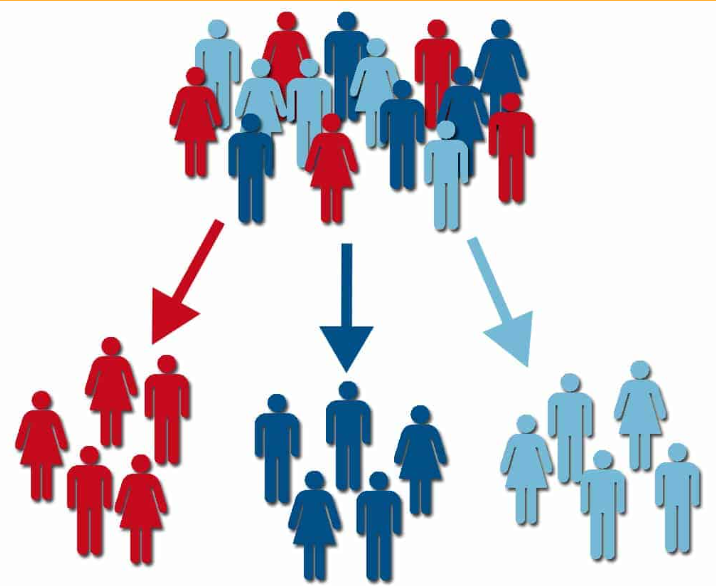

In [28]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


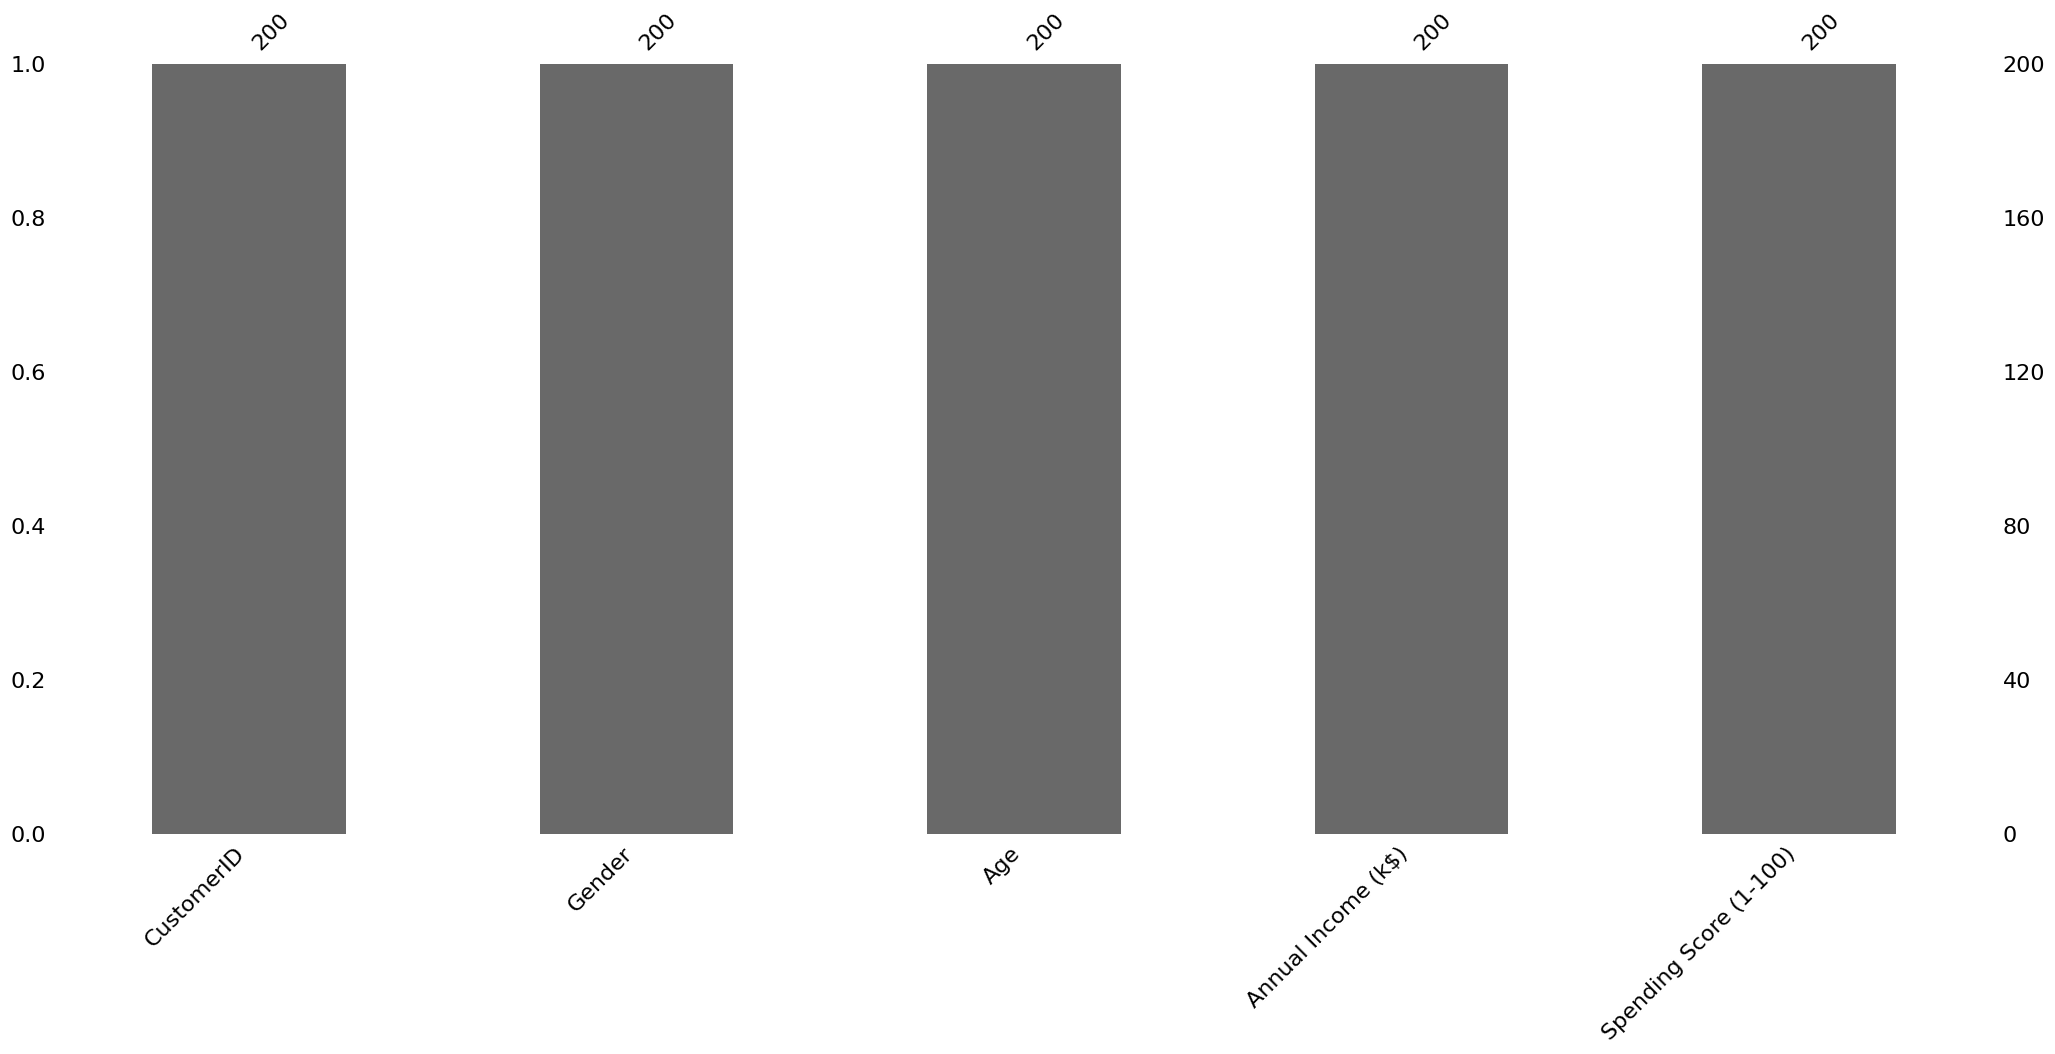

In [30]:
import missingno as msno
import matplotlib.pylab as plt
msno.bar(df)
plt.show()

In [31]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
df.drop('CustomerID',axis=1,inplace=True)

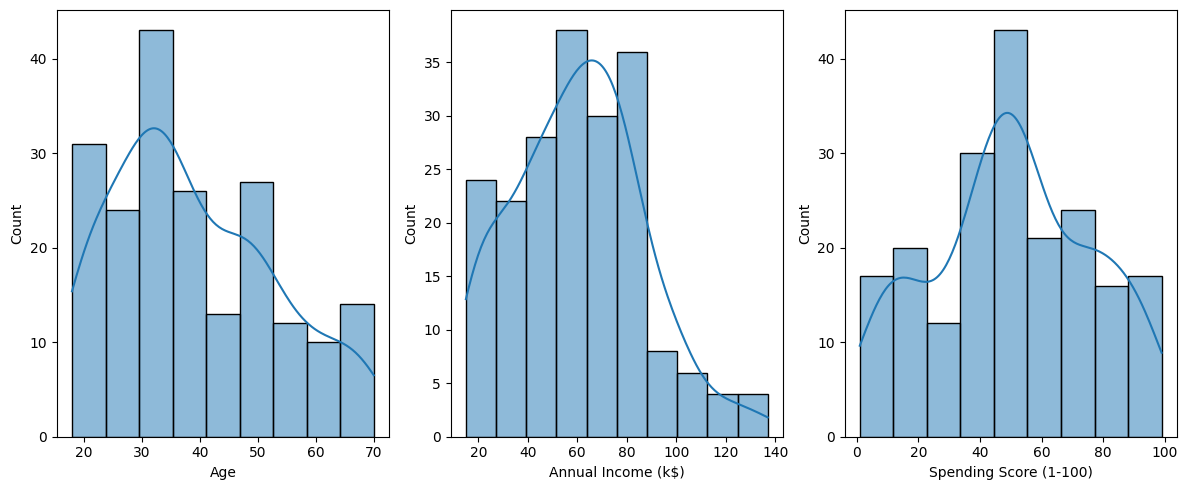

In [33]:
# 밀도 그래프
import seaborn as sns
_,ax = plt.subplots(1,3,figsize=(12,5))
for i,col in enumerate(['Age',	'Annual Income (k$)',	'Spending Score (1-100)']):        
    sns.histplot(df[col],ax=ax[i],kde=True)
plt.tight_layout()
plt.show()    
            

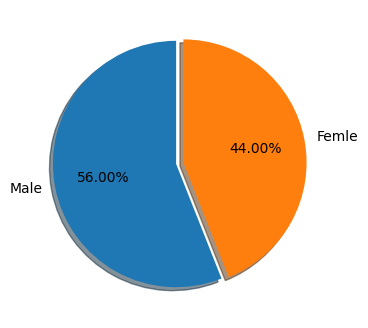

In [34]:
# 범주형 데이터
values = df['Gender'].value_counts()
labels = ['Male','Femle']
_, ax = plt.subplots(figsize=(4,4), dpi = 100)
explode = (0,0.06)
ax.pie(values,labels=labels,explode=explode,startangle=90,shadow=True,autopct='%1.2f%%')
plt.show()

[40 58 31 35 19 17] [18.         26.66666667 35.33333333 44.         52.66666667 61.33333333
 70.        ]


<BarContainer object of 6 artists>

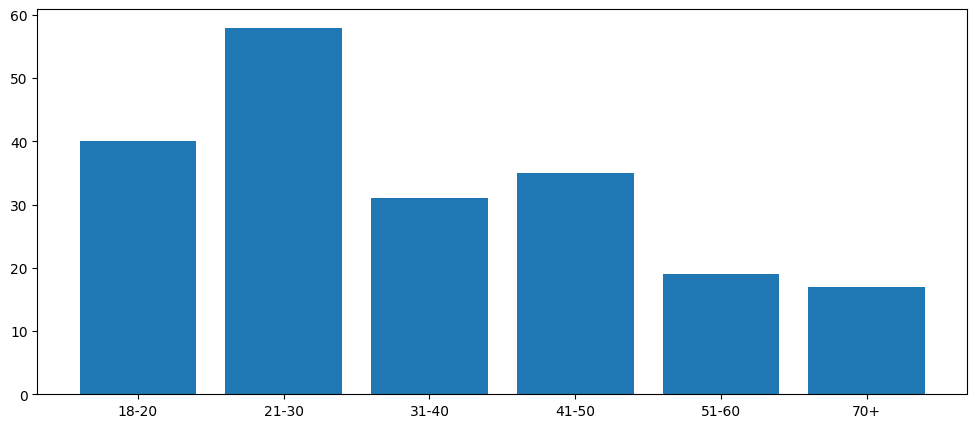

In [35]:
# 나이는 구간별로 나눠서 hisogram으로 표현 해 주면 
import numpy as np
lables = ['18-20','21-30','31-40','41-50','51-60','70+']
cnt, bins = np.histogram(df['Age'],bins=6)
print(cnt,bins)
plt.figure(figsize=(12,5))
# pd.cut(df['Age'],bins=bins,labels=list(range(len(bins)-1)), include_lowest=True)
# label = [ f"{np.round(bins[i])}-{np.round(bins[i+1])}" for i in range(len(bins)-1)]
plt.bar(x = lables, height  = cnt)


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

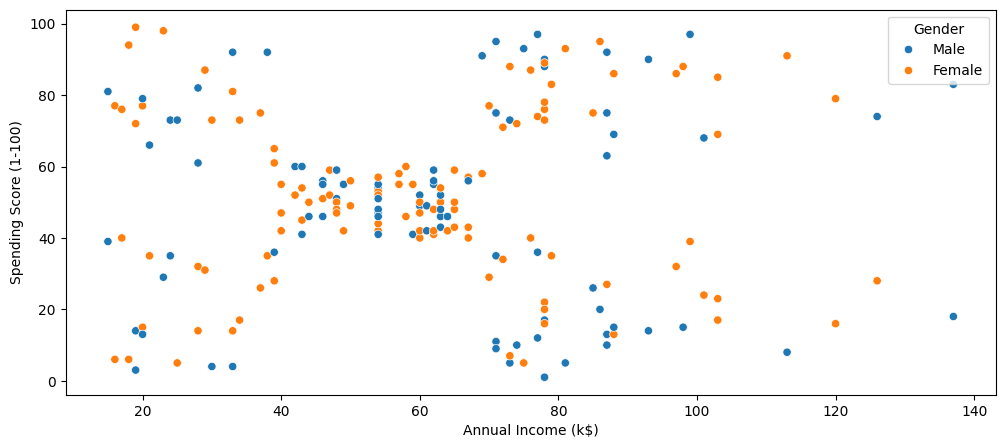

In [36]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df, x= 'Annual Income (k$)', y= 'Spending Score (1-100)',hue='Gender')

- kmeans

In [37]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
df = pd.read_csv('./Mall_Customers.csv')
df = df.drop('CustomerID',axis=1)
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df_encode_scaled =  StandardScaler().fit_transform(df)
df_encode_scaled[:6]

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627]])

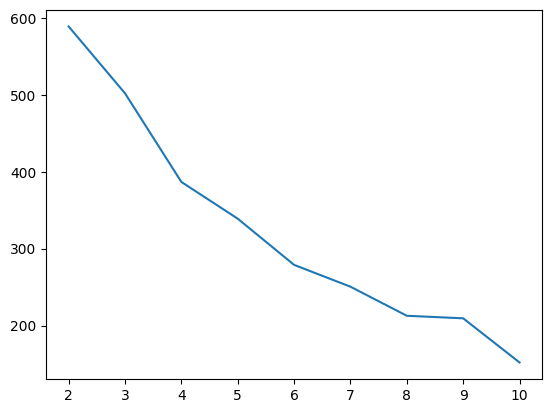

In [38]:
from sklearn.cluster import KMeans
result = []
for k in range(2,11):
    km = KMeans(n_clusters=k)
    km.fit(df_encode_scaled)
    result.append(km.inertia_)
plt.plot(range(2,11), result)   
plt.show() 

In [39]:
km = KMeans(n_clusters=4)
km.fit(df_encode_scaled)
km.labels_

array([2, 2, 2, 2, 2, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 2, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 3, 0, 3, 0, 3, 2, 3, 3, 2, 0, 0, 3, 2,
       0, 0, 2, 2, 3, 0, 0, 0, 3, 2, 0, 3, 2, 0, 3, 3, 3, 0, 2, 3, 0, 2,
       2, 0, 0, 2, 3, 0, 0, 2, 0, 2, 3, 2, 2, 0, 3, 2, 3, 2, 0, 3, 3, 3,
       3, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 3, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 0, 1, 3, 1, 0, 1, 0, 1, 3, 1, 3, 1, 0, 1, 3, 1, 0, 1,
       0, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 0, 1,
       3, 1, 3, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1,
       3, 1])

In [40]:
df = pd.read_csv('./Mall_Customers.csv')
df['Cluster'] = km.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


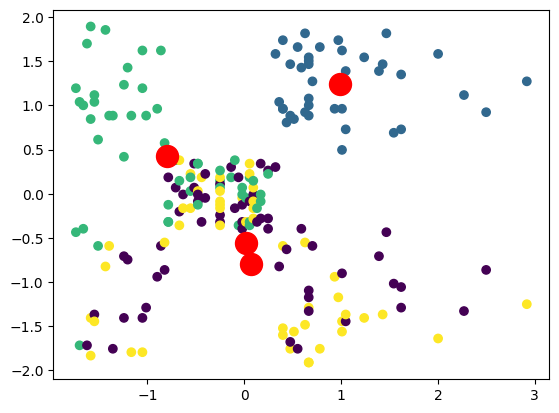

In [41]:
# sns.scatterplot(data = df, x='Annual Income (k$)', y = 'Spending Score (1-100)', hue='Cluster')
plt.scatter(df_encode_scaled[:,2],df_encode_scaled[:,3],c=km.labels_)
plt.scatter(km.cluster_centers_[:,2],km.cluster_centers_[:,3], color='red',s=250)


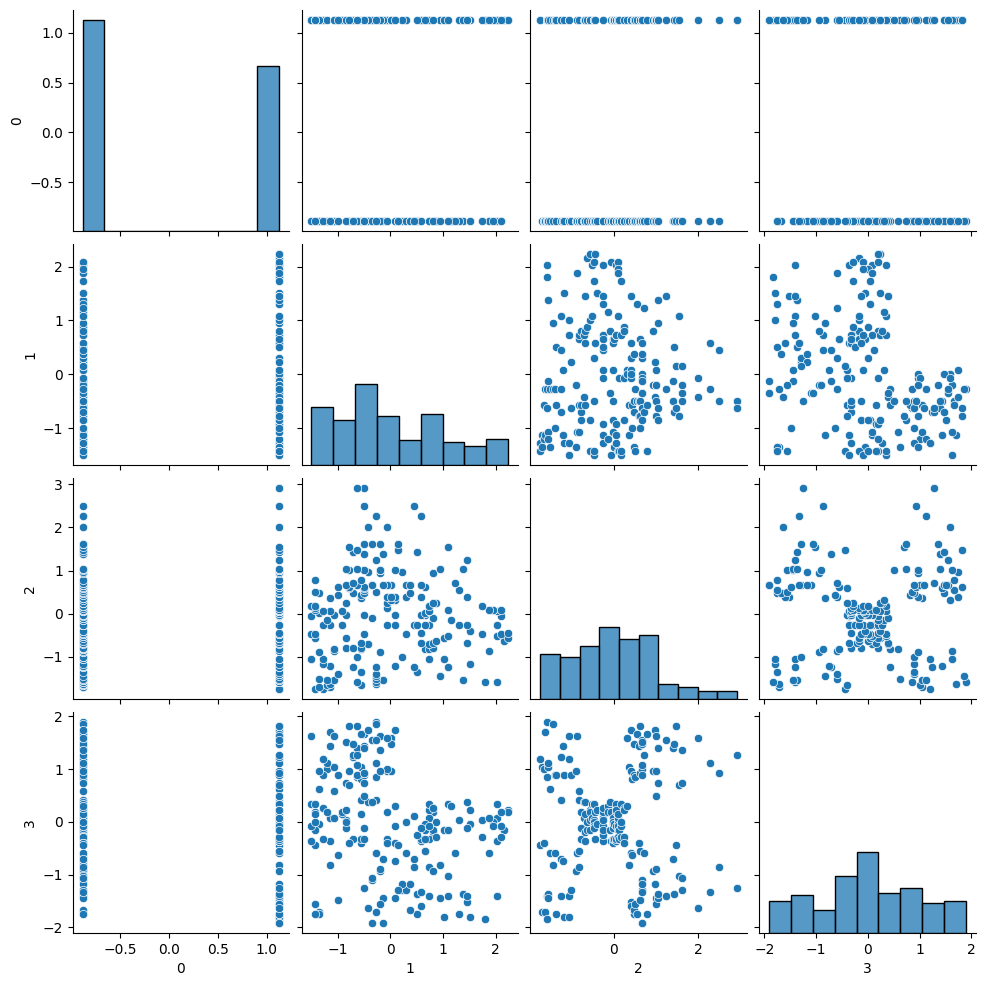

In [42]:
sns.pairplot(pd.DataFrame( df_encode_scaled))

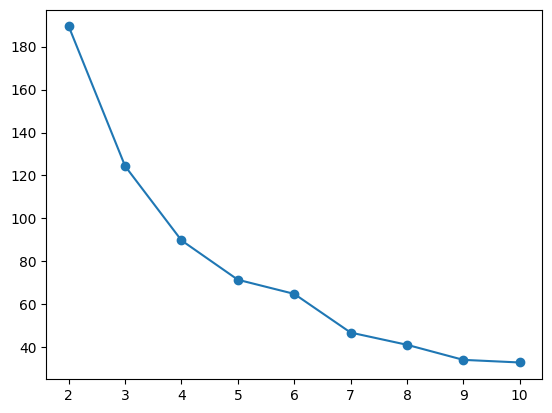

In [43]:
# 나이와 소비지수 간의 kmeans
df2 = df.loc[:,['Age','Spending Score (1-100)']]
df2_scaled = StandardScaler().fit_transform(df2)

result = []
for k in range(2,11):
    try:
        km = KMeans(n_clusters=k)
        km.fit(df2_scaled)
        result.append(km.inertia_)
    except:
        print(k)
plt.plot(range(2,11), result,marker='o')


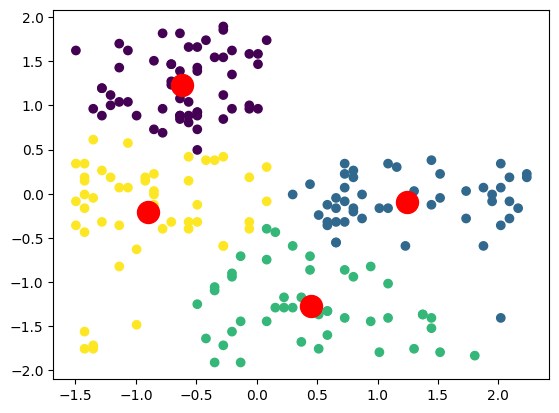

In [44]:
km = KMeans(n_clusters=4)
km.fit(df2_scaled)
plt.scatter(df2_scaled[:,0],df2_scaled[:,1], c=km.labels_)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red',s=250)


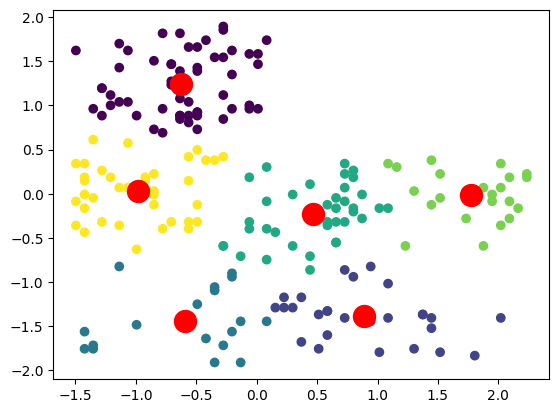

In [45]:
km = KMeans(n_clusters=6)
km.fit(df2_scaled)
plt.scatter(df2_scaled[:,0],df2_scaled[:,1], c=km.labels_)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red',s=250)

- 나이 VS 연평균 소득

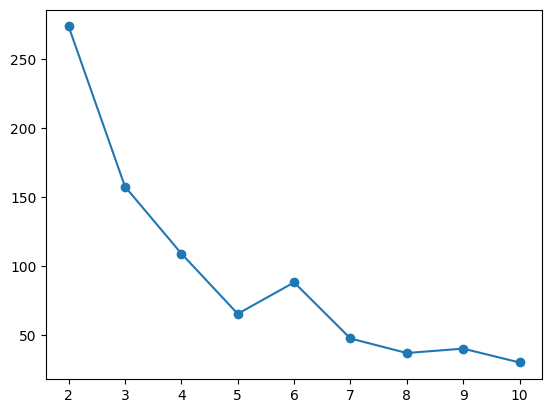

In [46]:
# 나이와 연평균 소득지수 kmeans
df2 = df.loc[:,['Spending Score (1-100)','Annual Income (k$)']]
df2_scaled = StandardScaler().fit_transform(df2)

result = []
for k in range(2,11):
    try:
        km = KMeans(n_clusters=k)
        km.fit(df2_scaled)
        result.append(km.inertia_)
    except:
        print(k)
plt.plot(range(2,11), result,marker='o')


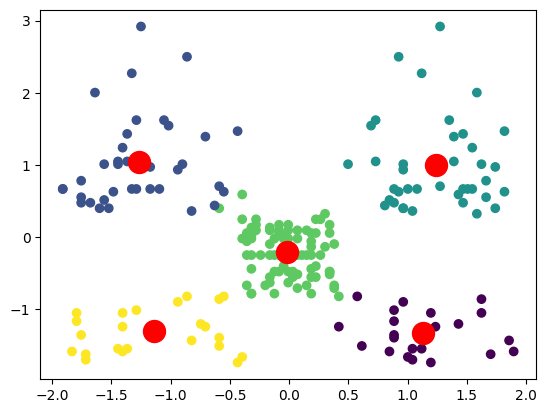

In [47]:
km = KMeans(n_clusters=5)
km.fit(df2_scaled)
plt.scatter(df2_scaled[:,0],df2_scaled[:,1], c=km.labels_)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red',s=250)

- DBSCAN

In [48]:
df = pd.DataFrame(df2_scaled)